In [34]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user, password, host
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}' 

In [3]:
def new_zillow_data():
    '''
    This function reads in the Zillow data from the Codeup db
    and returns a pandas DataFrame with selected columns.
    '''
    sql_query = '''
                select 
                bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                from properties_2017
                join propertylandusetype using (propertylandusetypeid)
                where propertylandusedesc = "Single Family Residential"
                '''
    
    return pd.read_sql(sql_query, get_connection('zillow'))

In [4]:
df = new_zillow_data()

In [5]:
df.head().T

,0,1,2,3,4
bedroomcnt,0.0,0.0,0.0,0.00,4.00
bathroomcnt,0.0,0.0,0.0,0.00,2.00
calculatedfinishedsquarefeet,NaN,NaN,NaN,NaN,3633.00
taxvaluedollarcnt,27516.0,10.0,10.0,2108.00,296425.00
yearbuilt,NaN,NaN,NaN,NaN,2005.00
taxamount,NaN,NaN,NaN,174.21,6941.39
fips,6037.0,6037.0,6037.0,6037.00,6037.00


In [6]:
df.shape

(2152863, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [12]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [13]:
df.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [15]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [17]:
# Check out the values and their frequencies from in each column.

df.bedroomcnt.value_counts(dropna=False, ascending=True)


25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13187
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedroomcnt, dtype: int64

In [19]:
df.bathroomcnt.value_counts(dropna=False, ascending=True)


19.00         1
32.00         1
19.50         1
14.50         1
12.50         3
11.50         3
1.75          3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13027
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     943589
Name: bathroomcnt, dtype: int64

In [20]:
df.calculatedfinishedsquarefeet.value_counts(dropna=False, ascending=True)

24920.0       1
10127.0       1
35046.0       1
8803.0        1
16134.0       1
           ... 
1400.0     3833
1120.0     4362
1080.0     4389
1200.0     5195
NaN        8484
Name: calculatedfinishedsquarefeet, Length: 10581, dtype: int64

In [21]:
df.taxvaluedollarcnt.value_counts(dropna=False, ascending=True)

27516.0        1
167020.0       1
145983.0       1
81898.0        1
1503486.0      1
            ... 
440000.0     685
430000.0     690
400000.0     729
500000.0     779
450000.0     821
Name: taxvaluedollarcnt, Length: 592270, dtype: int64

In [23]:
df.yearbuilt.value_counts(dropna=False, ascending=True)

1874.0        1
1877.0        1
1862.0        1
1840.0        1
1807.0        1
          ...  
1956.0    61942
1953.0    62342
1954.0    69163
1950.0    71693
1955.0    84405
Name: yearbuilt, Length: 154, dtype: int64

In [24]:
df.taxamount.value_counts(dropna=False, ascending=True)

3425.69       1
5555.02       1
4921.21       1
871.75        1
3475.45       1
           ... 
285.30       67
343.52       75
344.18       77
345.72      172
NaN        4442
Name: taxamount, Length: 918839, dtype: int64

In [26]:
df = df.dropna()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [28]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [43]:
# change names of columns to something that makes sense
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built',
                          'taxamount':'tax_amount'})

In [44]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   area        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.6 MB


In [46]:
df.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [47]:
df.value_counts()

bedrooms  bathrooms  area     tax_value  year_built  tax_amount  fips  
3.0       1.0        1002.0   39230.0    1962.0      419.14      6111.0    21
2.0       2.5        1008.0   101575.0   1988.0      1450.58     6059.0    16
4.0       3.0        2539.0   678000.0   2005.0      9094.20     6059.0    14
3.0       2.5        1358.0   194027.0   2000.0      2317.92     6111.0    14
                     2060.0   455635.0   2007.0      5271.34     6059.0    13
                                                                           ..
          2.0        1312.0   55069.0    1954.0      874.62      6059.0     1
                              54603.0    1963.0      857.48      6059.0     1
                              54300.0    1955.0      954.44      6037.0     1
                              54293.0    1956.0      947.47      6037.0     1
25.0      20.0       11700.0  1608491.0  2010.0      19238.87    6037.0     1
Length: 2130214, dtype: int64

In [48]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1198531, 7) (513657, 7) (428047, 7)


In [49]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 1567873 to 372341
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1198531 non-null  float64
 1   bathrooms   1198531 non-null  float64
 2   area        1198531 non-null  float64
 3   tax_value   1198531 non-null  float64
 4   year_built  1198531 non-null  float64
 5   tax_amount  1198531 non-null  float64
 6   fips        1198531 non-null  float64
dtypes: float64(7)
memory usage: 73.2 MB


In [ ]:
# Apply the scalers we talked about in this lesson to your data 
# and visualize the results for the unscaled and scaled distribution .

In [54]:
cols_to_scale = ['bedrooms', 'bathrooms','area', 'tax_value']

In [55]:
train_scaled = train.copy()
scaler = MinMaxScaler()
train_scaled[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

In [57]:
train_scaled

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1567873,0.200000,0.03125,0.001309,0.002124,1950.0,2712.21,6037.0
1218138,0.133333,0.06250,0.001391,0.014915,1950.0,16539.04,6037.0
339661,0.133333,0.03125,0.001104,0.003954,1953.0,4575.16,6037.0
1017133,0.200000,0.06250,0.001317,0.001941,1946.0,2635.51,6037.0
40250,0.200000,0.06250,0.001721,0.006020,1957.0,6344.96,6059.0
...,...,...,...,...,...,...,...
941799,0.133333,0.03125,0.000730,0.000307,1954.0,918.71,6037.0
631585,0.200000,0.09375,0.002184,0.006870,1987.0,7319.49,6037.0
883917,0.200000,0.06250,0.001828,0.002176,1957.0,2512.91,6037.0
1253096,0.266667,0.09375,0.002168,0.006845,1924.0,7650.55,6037.0


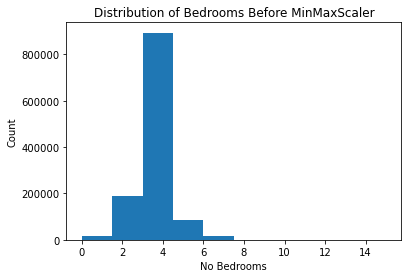

In [58]:
# Distribution of bedrooms before MinMaxScaler applied
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('No Bedrooms')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

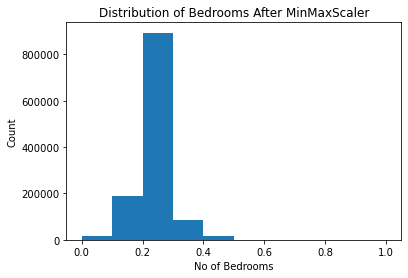

In [63]:
# Distribution of bedrooms after MinMax Scaler applied
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('No of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

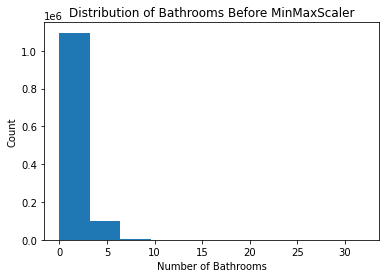

In [60]:
# Distribution of bathrooms before MinMaxScaler applied
plt.hist(train.bathrooms)
plt.title('Distribution of Bathrooms Before MinMaxScaler')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

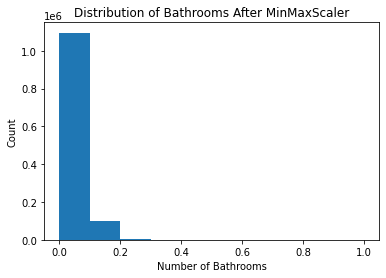

In [62]:
# Distribution of bathrooms after MinMaxScaler applied
plt.hist(train_scaled.bathrooms)
plt.title('Distribution of Bathrooms After MinMaxScaler')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [64]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} Before scaling', xlabel=col, ylabel='Count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} After scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='Count')
    plt.tight_layout()

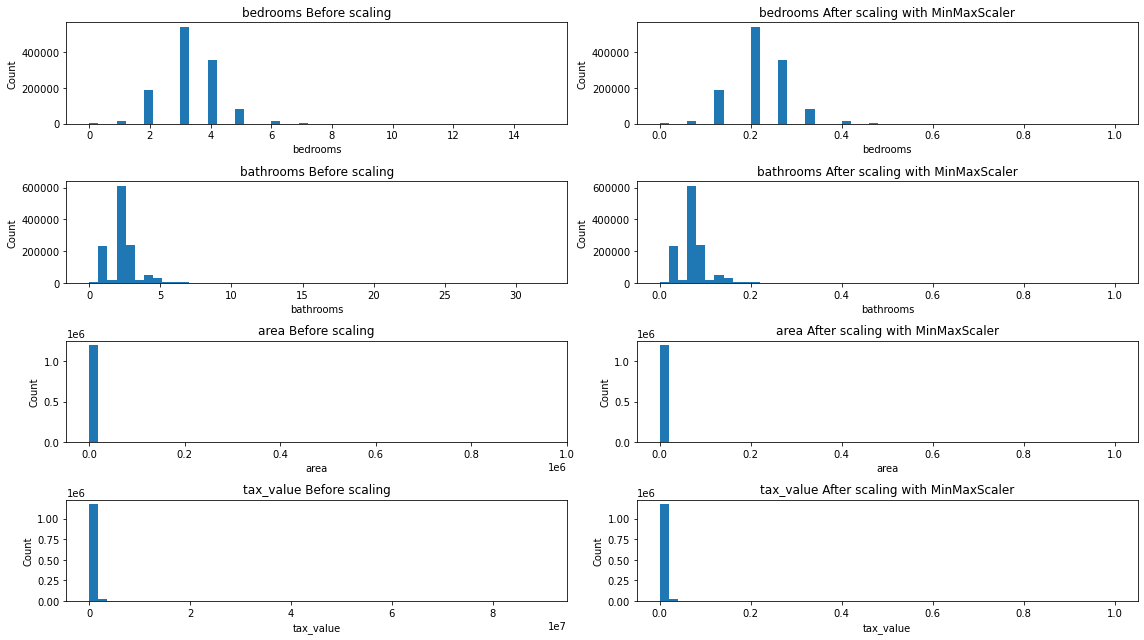

In [65]:
# MinMaxScaler applied on the visualize_scaler function

visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=cols_to_scale, bins=50)

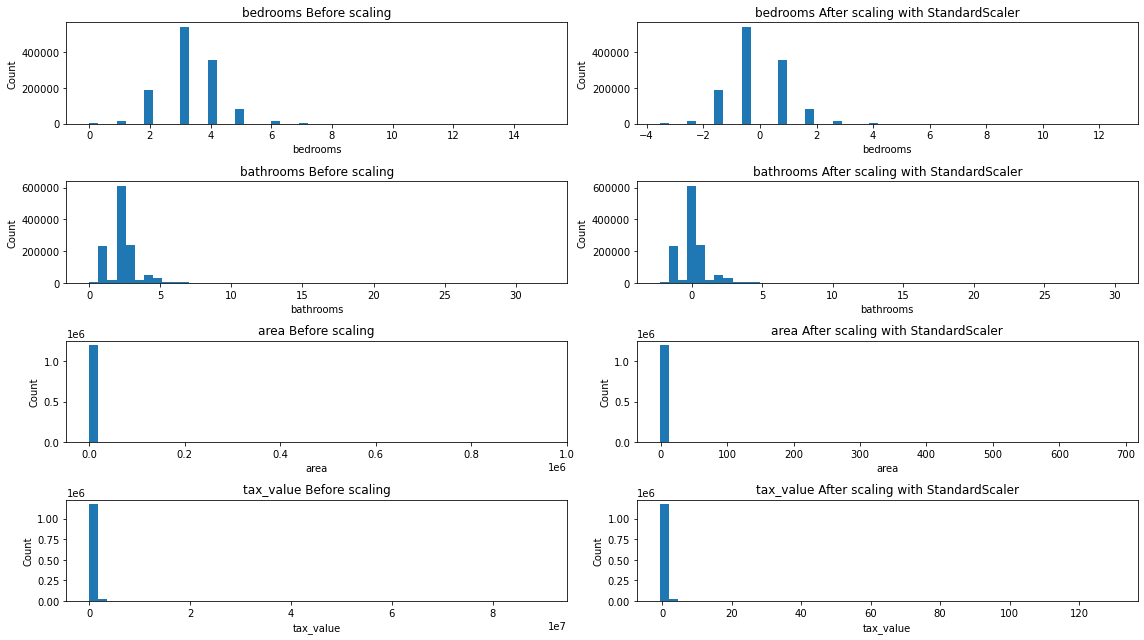

In [66]:
# StandardScaler applied on the visualize_scaler function

visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=cols_to_scale, bins=50)

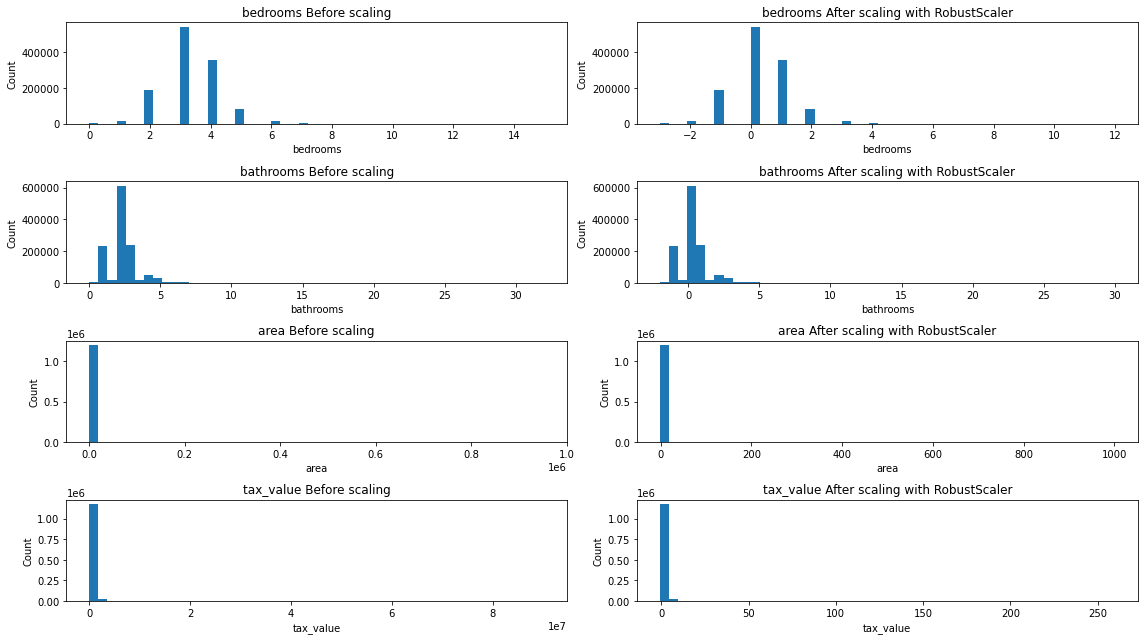

In [67]:
# RobustScaler applied on the visualize_scaler function

visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=cols_to_scale, bins=50)

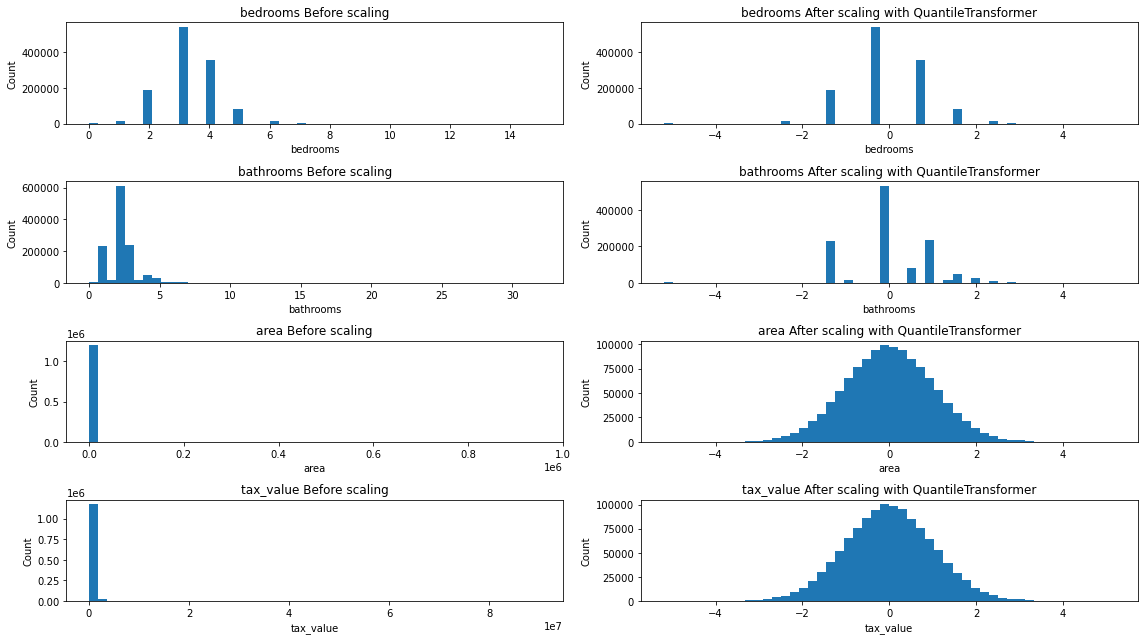

In [68]:
# Read the documentation for sklearn's QuantileTransformer. 
# Use normal for the output_distribution and apply this scaler to your data. 
# Visualize the result of your data scaling.


# QuantileTransformer applied on the visualize_scaler function with normalized distribution output

visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=cols_to_scale, bins=50)

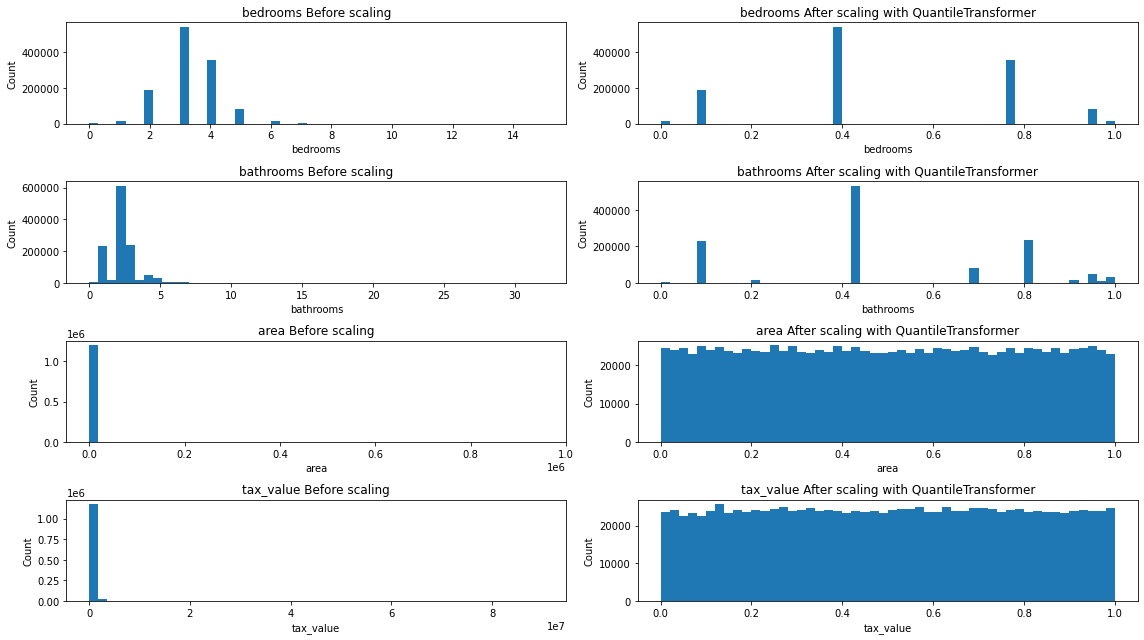

In [70]:
# Use the QuantileTransformer, but omit the output_distribution argument. 
# Visualize your results. What do you notice?

# QuantileTransformer applied on the visualize_scaler function without normalized distribution output

visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=cols_to_scale, bins=50)

 ## Takeways
 #### area and tax value are not distributed normally anymore

In [ ]:
# Apply the .inverse_transform method to your scaled data. 
# Is the resulting dataset the exact same as the original data?

In [75]:
scaler = MinMaxScaler()
original_data = train[['tax_value']]
scaled_data = scaler.fit_transform(original_data)

In [76]:
scaled_data[:5]

array([[0.00212395],
       [0.01491526],
       [0.00395423],
       [0.0019409 ],
       [0.00602048]])

In [77]:
original_data[:5]

,tax_value
1567873,191578.0
1218138,1345206.0
339661,356648.0
1017133,175069.0
40250,543000.0


In [78]:
scaler.inverse_transform(scaled_data)[:5]

array([[ 191578.],
       [1345206.],
       [ 356648.],
       [ 175069.],
       [ 543000.]])

In [ ]:
# Inverse transform gives back the unscaled dataset

Based on the work you've done, choose a scaling method for your dataset. 
Write a function within your prepare.py that accepts as input the train, validate, and test data splits, 
and returns the scaled versions of each. 
Be sure to only learn the parameters for scaling from your training data!

In [85]:
def scaled_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'tax_value', 'area'],
               return_scaler=False):
    '''
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [86]:
train_scaled

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1567873,0.200000,0.03125,0.001309,0.002124,1950.0,2712.21,6037.0
1218138,0.133333,0.06250,0.001391,0.014915,1950.0,16539.04,6037.0
339661,0.133333,0.03125,0.001104,0.003954,1953.0,4575.16,6037.0
1017133,0.200000,0.06250,0.001317,0.001941,1946.0,2635.51,6037.0
40250,0.200000,0.06250,0.001721,0.006020,1957.0,6344.96,6059.0
...,...,...,...,...,...,...,...
941799,0.133333,0.03125,0.000730,0.000307,1954.0,918.71,6037.0
631585,0.200000,0.09375,0.002184,0.006870,1987.0,7319.49,6037.0
883917,0.200000,0.06250,0.001828,0.002176,1957.0,2512.91,6037.0
1253096,0.266667,0.09375,0.002168,0.006845,1924.0,7650.55,6037.0


In [91]:
validate_scaled()

NameError: name 'validate_scaled' is not defined